In [1]:
#List files

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./project1.ipynb
./adult.test
./README.md
./adult.names
./old.adult.names
./adult.data
./.ipynb_checkpoints/project1-checkpoint.ipynb


In [2]:
# Load data

df = pd.read_csv("./adult.data", header=None)
columns = [
    'age', # continuous.
    'workclass', # Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # continuous. final weight based on Gov CPS data
    'education', # Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    'education-num', # continuous.
    'marital-status', # Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    'occupation', # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    'relationship', # Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    'race', # White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    'sex', # Female, Male.
    'capital-gain', # continuous.
    'capital-loss', # continuous.
    'hours-per-week', # continuous.
    'native-country', # United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
    'income'
]
df.columns = columns

# df.columns = df.columns.str.lower()

with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    display(df)    


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
# Prepare columns

categorical_columns = [
    'workclass', # Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'education', # Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    'marital-status', # Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    'occupation', # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    'relationship', # Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    'race', # White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    'sex', # Female, Male.
    'native-country', # United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
]
numerical_columns = [
    'age', # continuous.
    'fnlwgt', # continuous. final weight based on Gov CPS data
    'education-num', # continuous.
    'capital-gain', # continuous.
    'capital-loss', # continuous.
    'hours-per-week', # continuous.
]

y_column = 'income'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Check data

#trim all categorical fields
for column in categorical_columns:
    df[column] = df[column].str.strip()

isnull_count = pd.DataFrame(df.isnull().sum(), columns=["isnull count"])
isna_count = pd.DataFrame(df.isna().sum(), columns=["isna count"])
isin_count = pd.DataFrame(df.isin(["NaN", "-", "", ".", "_", "?"]).sum(), columns=["isin count"])
pd.concat([isnull_count, isna_count, isin_count], axis=1)



,isnull count,isna count,isin count
age,0,0,0
workclass,0,0,1836
fnlwgt,0,0,0
education,0,0,0
education-num,0,0,0
marital-status,0,0,0
occupation,0,0,1843
relationship,0,0,0
race,0,0,0
sex,0,0,0


AttributeError: 'DataFrameGroupBy' object has no attribute 'churn'

In [9]:
# Cleanup data
df_clean = df.copy()

for column in categorical_columns:
    df_clean[column].replace({"?": "unknown"}, inplace=True)

# prepare y
df_clean['low_income'] = df.income.str.strip() == '<=50K'
del df_clean["income"]

# delete rows with unknown fields
for column in categorical_columns:
    df_clean[column].replace({"unknown": np.nan}, inplace=True)
df_clean = df_clean.dropna()    

#reset index
df_clean = df_clean.reset_index(drop=True)

df_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,low_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,True
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,False
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,True
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,True


In [27]:
# EDA Exploritory Data Analysis

with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    
    df_selection_by_sex = df_clean[df_clean.age >= 40].groupby("sex").low_income.agg(["mean", "count"]).T
    display("Low income people working fulltime by sex:", df_selection_by_sex)
    
    df_selection_by_age = df_clean[df_clean.age >= 40].groupby("age").low_income.agg(["mean", "count"]).T
    display("Low income people working fulltime by age:", df_selection_by_age)
    
    df_selection_by_education = df_clean[df_clean.age >= 40].groupby("education").low_income.agg(["mean", "count"]).sort_values(by=['mean']).T
    display("Low income people working fulltime by education:", df_selection_by_education)
    
    df_selection_by_country = df_clean[df_clean.age >= 40].groupby("native-country").low_income.agg(["mean", "count"]).sort_values(by=['mean']).T
    display("Low income people working fulltime by country:", df_selection_by_country)
    
    
    


'Low income people working fulltime by sex:'

sex,Female,Male
mean,0.839069,0.553859
count,3865.000000,9302.000000


'Low income people working fulltime by age:'

age,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,90
mean,0.657516,0.647594,0.646424,0.641992,0.607955,0.601983,0.600563,0.591508,0.600382,0.636036,0.561739,0.588441,0.597802,0.591518,0.573604,0.65285,0.667638,0.623145,0.656977,0.626506,0.673913,0.687259,0.737089,0.736559,0.734104,0.772059,0.727273,0.711712,0.755556,0.8125,0.75,0.777778,0.85,0.816327,0.684211,0.823529,0.931034,0.85,0.642857,0.6,0.9375,0.846154,1.0,0.6,0.875,1.0,1.0,1.0,0.8
count,765.000000,769.000000,741.000000,743.000000,704.000000,706.000000,711.000000,683.000000,523.000000,555.000000,575.000000,571.000000,455.000000,448.000000,394.000000,386.00000,343.000000,337.000000,344.000000,332.000000,276.000000,259.000000,213.000000,186.000000,173.000000,136.000000,110.000000,111.000000,90.000000,80.0000,64.00,54.000000,40.00,49.000000,38.000000,34.000000,29.000000,20.00,14.000000,15.0,16.0000,13.000000,7.0,5.0,8.000,3.0,1.0,3.0,35.0


'Low income people working fulltime by education:'

education,Doctorate,Prof-school,Masters,Bachelors,Assoc-voc,Assoc-acdm,Some-college,HS-grad,12th,10th,11th,9th,7th-8th,1st-4th,5th-6th,Preschool
mean,0.193431,0.202312,0.379147,0.442388,0.635359,0.642317,0.658268,0.753541,0.819048,0.863248,0.883333,0.911628,0.92328,0.933333,0.953947,1.0
count,274.000000,346.000000,1055.000000,2161.000000,543.000000,397.000000,2540.000000,4236.000000,105.000000,351.000000,300.000000,215.000000,378.00000,90.000000,152.000000,24.0


'Low income people working fulltime by country:'

native-country,Taiwan,Cambodia,Japan,India,Iran,Germany,Italy,England,Philippines,Canada,Ireland,United-States,France,South,China,Hong,Hungary,Scotland,Greece,Poland,Yugoslavia,Honduras,El-Salvador,Cuba,Haiti,Jamaica,Laos,Portugal,Puerto-Rico,Ecuador,Guatemala,Mexico,Vietnam,Trinadad&Tobago,Columbia,Dominican-Republic,Outlying-US(Guam-USVI-etc),Thailand,Peru,Nicaragua
mean,0.214286,0.375,0.444444,0.454545,0.5,0.54386,0.553191,0.568182,0.580247,0.607143,0.625,0.630316,0.636364,0.65625,0.666667,0.666667,0.666667,0.666667,0.681818,0.75,0.75,0.75,0.757576,0.807018,0.809524,0.814815,0.833333,0.857143,0.859649,0.875,0.875,0.89172,0.894737,0.909091,0.916667,1.0,1.0,1.0,1.0,1.0
count,14.000000,8.000,27.000000,44.000000,18.0,57.00000,47.000000,44.000000,81.000000,56.000000,8.000,12086.000000,11.000000,32.00000,39.000000,3.000000,9.000000,6.000000,22.000000,28.00,8.00,4.00,33.000000,57.000000,21.000000,27.000000,6.000000,14.000000,57.000000,8.000,16.000,157.00000,19.000000,11.000000,24.000000,30.0,7.0,7.0,13.0,8.0


In [6]:
# Split data

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=11)
df_train,  df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.low_income == True).astype('int').values
y_val = (df_val.low_income == True).astype('int').values
y_test = (df_test.low_income == True).astype('int').values

del df_train["low_income"]
del df_val["low_income"]
del df_test["low_income"]

# with pd.option_context('display.max_rows', 2, 'display.max_columns', None): 
#     display(df_test)   
    
print("df_train length: ", len(df_train))
print("df_val length: ", len(df_val))
print("df_test length: ", len(df_test))

print("y_train length: ", len(y_train))
print("y_val length: ", len(y_val))
print("y_test length: ", len(y_test))


df_train length:  18096
df_val length:  6033
df_test length:  6033
y_train length:  18096
y_val length:  6033
y_test length:  6033


In [52]:
#Hot encoding and Logistic regretion
from sklearn import linear_model

def train(dataFrame, y):
    # Hot Encoding
    dicts = dataFrame.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    # train
    model = linear_model.LogisticRegression()
    model.fit(X, y)
    return dv, model


dv, model = train(df_val, y_val)
weights = model.coef_[0].round(3) # weights
w0 = model.intercept_ # bias, w0

weights_with_featureNames = dict(zip(dv.get_feature_names(), weights))
print("w0 =", w0)
display(weights_with_featureNames)



w0 = [0.00035231]


{'age': 0.006,
 'capital-gain': -0.0,
 'capital-loss': -0.001,
 'education-num': 0.002,
 'education=10th': 0.0,
 'education=11th': 0.0,
 'education=12th': 0.0,
 'education=1st-4th': 0.0,
 'education=5th-6th': 0.0,
 'education=7th-8th': 0.0,
 'education=9th': 0.0,
 'education=Assoc-acdm': 0.0,
 'education=Assoc-voc': 0.0,
 'education=Bachelors': -0.0,
 'education=Doctorate': -0.0,
 'education=HS-grad': 0.0,
 'education=Masters': -0.0,
 'education=Preschool': 0.0,
 'education=Prof-school': -0.0,
 'education=Some-college': 0.0,
 'fnlwgt': 0.0,
 'hours-per-week': 0.008,
 'marital-status=Divorced': 0.0,
 'marital-status=Married-AF-spouse': -0.0,
 'marital-status=Married-civ-spouse': -0.0,
 'marital-status=Married-spouse-absent': 0.0,
 'marital-status=Never-married': 0.0,
 'marital-status=Separated': 0.0,
 'marital-status=Widowed': 0.0,
 'native-country=Cambodia': -0.0,
 'native-country=Canada': -0.0,
 'native-country=China': 0.0,
 'native-country=Columbia': 0.0,
 'native-country=Cuba': 0.0,

In [56]:
# Predict

def predict(dataFrame, dv, model):
    dicts = dataFrame.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred


proba = predict(df_val, dv, model)
y_pred_val = proba  #take column 1

low_salary_pred = (y_pred_val >= 0.5)
# customers_with_predicted_low_income = df_val[low_salary_pred]

In [57]:
# Check accuracy

#check average accuracy on y_val
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred_val
df_pred["prediction"] = low_salary_pred.astype(int)
df_pred["actual"] = y_val
df_pred["prediction_correct"] = df_pred.prediction == df_pred.actual
display(df_pred)
print("Accuracy % on y_val:",df_pred.prediction_correct.mean())

,probability,prediction,actual,prediction_correct
0,0.778779,1,1,True
1,0.698447,1,1,True
2,0.551195,1,1,True
3,0.222821,0,0,True
4,0.500607,1,1,True
...,...,...,...,...
6028,0.749363,1,1,True
6029,0.529573,1,1,True
6030,0.751034,1,0,False
6031,0.834650,1,1,True


Accuracy % on y_val: 0.7856787667826952


auc: 0.5783848811672052


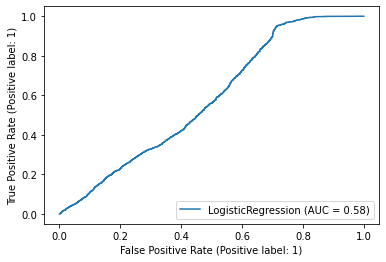

In [59]:
# AUC and ROC curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_val)
auc = metrics.auc(fpr, tpr)

# print("thresholds:", thresholds)
print("auc:", auc)



import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, svm

dicts = df_val.to_dict(orient="records")
X_val = dv.transform(dicts)
metrics.plot_roc_curve(model, X_val, y_val) 
plt.show()
